# Final Project | CO2 emissions and energy consumption analysis 

## Table of Contents:

* [Introduction](#introduction)
* [Data Cleaning and exploring](#cleaning)
* [EDA](#eda)
* [Data wrangling](#wrangling)
* [Unsupervised Machine Learning: K-Means](#kmeans)

## Introduction <a class="anchor" id="introduction"></a>

## CO2 emissions dataset

The dataset analysed in this project comes from Our World in Data [Our World in Data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions). The studied dataset includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics. [Find the dataset here](https://github.com/owid/co2-data).

The columns are explained in the following table:

| Column | Description |
| --- | --- | 
|iso_code|ISO 3166-1 alpha-3 – three-letter country codes|
|country|Geographic location|
|year|Year of observation|
|co2|Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes per year.|
|co2_growth_prct|Percentage change in CO2 emissions from one year relative to the previous year.|
|co2_growth_abs|Annual change in CO2 emissions from one year relative to the previous year, measured in million tonnes.|
|consumption_co2|Annual consumption-based CO2 emissions, measured in million tonnes per year.|
|trade_co2|Net CO2 emissions embedded in trade; this is the net difference between CO2 embedded in exported and imported goods, measured in million tonnes.|
|trade_co2_share|CO2 emissions embedded in trade, given as a percentage of national production-based emissions.|
|co2_per_capita|Average per capita CO2 emissions, measured in tonnes per year.|
|consumption_co2_per_capita|Per capita consumption-based CO2 emissions, measured in tonnes per year.|
|share_global_co2|National or regional annual CO2 emissions, measured as a percentage of the global total|
|cumulative_co2|Cumulative emissions of CO2 from 1751 through to the given year, measured in million tonnes.|
|share_global_cumulative_co2|National or regional annual cumulative CO2 emissions, measured as a share of the global total.|
|co2_per_gdp|CO2 emissions measured per unit of gross domestic product. GDP is adjusted for inflation and cross-country price differences (PPP-adjusted).|
|consumption_co2_per_gdp|	Consumption-based CO2 emissions measured per unit of gross domestic product. GDP is adjusted for inflation and cross-country price differences (PPP-adjusted).|
|co2_per_unit_energy|CO2 emissions measured per unit of energy consumed.|
|cement_co2	|CO2 emissions from cement production, measured in million tonnes.|CO2 emissions embedded in trade, given as a percentage of national production-based emissions.|
|coal_co2|CO2 emissions from coal production, measured in million tonnes.|
|flaring_co2|CO2 emissions from gas flaring, measured in million tonnes.|
|gas_co2|CO2 emissions from gas production, measured in million tonnes.|
|oil_co2|CO2 emissions from oil production, measured in million tonnes.|
|other_industry_co2|CO2 emissions from other industrial processes (excluding cement), measured in tonnes.|
|total_ghg|Annual greenhouse gas emissions, measured in million tonnes of carbon dioxide equivalents.|
|ghg_per_capita|Greenhouse gas emissions per capita, measured in tonnes of carbon dioxide equivalents.|
|methane|Annual methane emissions, measured in million tonnes of carbon dioxide equivalents.|
|methane_per_capita|Methane emissions per capita, measured in tonnes of carbon dioxide equivalents.|
|nitrous_oxide|Annual nitrous oxide emissions, measured in million tonnes of carbon dioxide equivalents.|
|primary_energy_consumption|Primary energy consumption, measured in terawatt-hours per year.|
|energy_per_capita|Primary energy consumption per capita, measured in kilowatt-hours per year.|
|energy_per_gdp|Primary energy consumption per unit of gross domestic product, measured in kilowatt-hours per international-$.|
|population|Total population|
|gdp|Total real gross domestic product, inflation-adjusted|

## Data cleaning and exploring <a class="anchor" id="cleaning"></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Get data

In [2]:
#convert the excel file to dataframe
df = pd.read_excel('datasets/owid-co2-data.xlsx')
df

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_oil_co2,share_global_cumulative_gas_co2,share_global_cumulative_flaring_co2,share_global_cumulative_cement_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.000,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.000,0.004,NaN,NaN,NaN,0.021,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,0.001,0.004,NaN,NaN,NaN,0.036,0.063,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.000,0.005,NaN,NaN,NaN,0.026,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,0.001,0.004,NaN,NaN,NaN,0.061,0.129,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.000,0.004,NaN,NaN,NaN,0.032,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,0.001,0.003,NaN,NaN,NaN,0.093,0.189,NaN,NaN,NaN,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.000,0.005,NaN,NaN,NaN,0.038,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,0.001,0.003,NaN,NaN,NaN,0.131,0.257,NaN,NaN,NaN,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015,12.170,1.653,0.198,13.308,1.138,9.350,0.881,0.963,0.035,726.480,0.048,0.486,0.532,NaN,0.504,8.035,NaN,NaN,3.631,NaN,0.037,0.582,NaN,NaN,0.263,NaN,0.055,0.030,NaN,NaN,0.035,577.422,131.580,NaN,NaN,17.478,0.081,0.025,NaN,NaN,0.049,67.49,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016,10.815,-11.139,-1.356,12.171,1.356,12.542,0.771,0.868,0.031,737.295,0.048,0.430,0.484,NaN,0.581,7.061,NaN,NaN,3.173,NaN,0.041,0.503,NaN,NaN,0.226,NaN,0.049,0.027,NaN,NaN,0.040,584.482,134.753,NaN,NaN,18.059,0.080,0.025,NaN,NaN,0.049,65.98,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017,10.247,-5.251,-0.568,11.774,1.527,14.902,0.720,0.827,0.029,747.542,0.047,NaN,NaN,NaN,0.581,6.383,NaN,NaN,3.283,NaN,0.041,0.448,NaN,NaN,0.231,NaN,0.044,0.027,NaN,NaN,0.039,590.865,138.036,NaN,NaN,18.640,0.080,0.025,NaN,NaN,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018,11.341,10.674,1.094,12.815,1.475,13.006,0.785,0.888,0.031,758.882,0.047,NaN,NaN,NaN,0.581,7.369,NaN,NaN,3.390,NaN,0.040,0.510,NaN,NaN,0.235,NaN,0.050,0.028,NaN,NaN,0.038,598.234,141.426,NaN,NaN,19.222,0.079,0.025,NaN,NaN,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


### 2. Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21910 non-null  float64
 5   co2_growth_abs                       22017 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22383 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

In [4]:
df.describe()

,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_oil_co2,share_global_cumulative_gas_co2,share_global_cumulative_flaring_co2,share_global_cumulative_cement_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
count,23708.000000,23170.000000,21910.000000,22017.000000,3350.000000,3318.000000,3318.000000,22383.000000,3350.000000,23103.000000,2.357800e+04,23578.000000,14918.000000,3088.000000,6743.000000,12182.000000,16991.000000,4302.000000,8693.000000,19711.000000,1563.000000,12153.000000,16471.000000,4301.000000,8665.00000,19393.000000,1563.000000,16991.000000,19711.000000,8693.000000,4302.000000,12182.000000,18552.000000,19963.000000,9187.000000,4933.000000,12563.000000,18552.000000,19963.000000,9187.000000,4933.000000,12563.000000,5208.000000,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6044.000000,6044.000000,6044.000000,2.107100e+04,1.300200e+04
mean,1951.670997,270.245818,17.705591,5.784158,222.596056,3.673305,27.047046,4.059490,6.556161,5.155362,1.036949e+04,5.198693,0.462111,0.385822,0.231178,12.909967,176.696376,15.009035,109.917265,108.076481,10.036499,0.114305,1.551907,0.874481,1.42306,2.458824,0.087681,7.068457,3.085599,5.491435,5.970189,3.693983,8091.807517,3298.187156,2460.605452,377.466486,303.171909,6.676975,3.063965,5.040919,5.026469,3.567045,441.481429,8.099506,82.253370,2.046923,29.308135,0.606690,1638.281196,27401.710621,2.293554,5.927539e+07,4.396605e+11
std,53.828319,1509.911932,290.750382,54.859594,773.261390,100.251878,52.599781,15.339885,7.303592,18.014885,6.249303e+04,18.629679,0.557402,0.260225,0.358510,77.756404,796.376333,41.084822,454.948665,620.906079,21.014507,0.148661,2.558295,5.514190,3.68034,15.565557,0.057153,20.880737,12.267356,18.594927,15.151680,13.791054,38183.146643,22243.597885,12396.549689,1273.833741,1737.873396,20.928897,12.314802,18.631930,14.384035,13.561960,3089.039496,9.387477,566.702756,3.534126,199.291118,0.844671,9666.490291,33293.462203,1.681657,3.730743e+08,3.666682e+12
min,1750.000000,-1.165000,-2835.714000,-860.211000,-1.344000,-1487.155000,-118.238000,-2.675000,-0.396000,-0.030000,0.000000e+00,0.000000,-0.252000,-0.030000,0.001000,0.001000,-0.114000,0.000000,-0.147000,-1.191000,0.000000,0.000000,-0.051000,0.000000,-0.05100,-2.950000,0.000000,-0.001000,-0.210000,-0.006000,0.000000,0.000000,0.000000,-0.011000,-0.147000,0.000000,0.002000,0.000000,-0.003000,-0.001000,0.000000,0.000000,-85.620000,-50.487000,0.000000,0.000000,0.000000,0.000000,0.208000,111.472000,0.048000,1.000000e+03,6.378000e+07
25%,1922.000000,0.546000,-1.070000,-0.011000,8.942000,0.000000,0.000000,0.234000,1.100500,0.006000,5.994000e+00,0.002000,0.145250,0.225000,0.161000,0.138000,0.333000,0.258250,0.370000,0.309000,0.561000,0.021000,0.053000,0.020000,0.03000,0.112000,0.052000,0.008000,0.012000,0.032000,0.095000,0.048000,2.453250,3.624500,1.889000,3.203000,1.585500,0.002000,0.007000,0.011000,0.039000,0.036000,8.162500,2.514000,2.150000,0.715000,0.535000,0.228000,46.319000,5829.803000,1.247000,1.333018e+06,8.926728e+09
50%,1965.000000,5.168000,4.361000,0.088000,36.854000,2.348000,16.319500,1.209000,4.040000,0.072000,8.631600e+01,0.033000,0.301000,0.326000,0.215000,0.581000,4.023000,2.010000,4.199000,2.126000,1.907000,0.071000,0.425000,0

#### Check column datatypes

In [5]:
df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
co2_growth_prct                        float64
co2_growth_abs                         float64
consumption_co2                        float64
trade_co2                              float64
trade_co2_share                        float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
cement_co2                             float64
coal_co2                               float64
flaring_co2                            float64
gas_co2                                float64
oil_co2      

All the columns correspond to the type they should.

#### Check nulls 

In [6]:
#get % of nulls per column
df.isnull().sum()*100/len(df)

iso_code                               11.717564
country                                 0.000000
year                                    0.000000
co2                                     2.269276
co2_growth_prct                         7.583938
co2_growth_abs                          7.132613
consumption_co2                        85.869749
trade_co2                              86.004724
trade_co2_share                        86.004724
co2_per_capita                          5.588831
consumption_co2_per_capita             85.869749
share_global_co2                        2.551881
cumulative_co2                          0.548338
share_global_cumulative_co2             0.548338
co2_per_gdp                            37.076092
consumption_co2_per_gdp                86.974861
co2_per_unit_energy                    71.558124
cement_co2                             48.616501
coal_co2                               28.332209
flaring_co2                            81.854226
gas_co2             

The dataset has a lot of nulls, some columns have more than 50% nulls that should be cleaned. As not all the columns will be useful for the analysis, only the necessary nulls will be removed.

In [7]:
#drop nulls in column 'co2', as the % is 2%
df = df[df['co2'].notna()]
df['co2'].isnull().sum()

0

In [8]:
#drop rows where iso-code is null, because they are not countries
df = df[df['iso_code'].notna()]
df.shape

(20439, 55)

In [9]:
#drop rows where population is null
df = df[df['population'].notna()]
df['population'].isnull().sum()

0

In [10]:
#drop columns that aren't interesting for the case study
df.drop(['cumulative_coal_co2','cumulative_oil_co2','cumulative_gas_co2','cumulative_flaring_co2','cumulative_cement_co2', 'share_global_cumulative_coal_co2','share_global_cumulative_oil_co2','share_global_cumulative_gas_co2', 'share_global_cumulative_flaring_co2','share_global_cumulative_flaring_co2','share_global_cumulative_cement_co2'],
        axis=1, inplace=True)

In [11]:
#check how many rows and columns are
df.shape

(20104, 45)

#### Filter years between 1960 and 2018

Filter the years of our data, to have insights of a more recent period of time. 

In [12]:
#drop values corresponding with years before 1960
df.drop(df[df['year'] < 1960 ].index, inplace = True)

In [13]:
#check the unique values of the year column
df['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

#### Analyse column 'country'

Check the spelling of countries names, the unique values and delete non-existing countries or regions.

In [14]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'French Po

There are also names of the continents and different regions, that are not relevant now so I'll drop them as well.

In [15]:
#drop rows corresponding to world
df.drop(df[df['country'] == 'World'].index, inplace = True)

In [16]:
df.shape

(11958, 45)

Export this cleaned data in order to use it in Tableau for visualizations.

In [17]:
df.to_excel('datasets/emission-clean.xlsx', index=False)

## EDA <a class="anchor" id="eda"></a>

#### Check for multicolinearity

In [18]:
df.corr()

,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
year,1.000000,0.064991,-0.050403,-0.001796,0.048903,-0.016699,0.065355,-0.019957,0.017565,-0.008608,0.081184,-0.008061,-0.090640,-0.267236,-0.056883,0.084721,0.067975,-0.047800,0.097792,0.048656,-0.015961,0.085956,-0.037269,-0.195103,0.117233,-0.030631,-0.091321,-0.001622,-0.011510,-0.044653,-0.157664,-0.016428,0.034212,-0.037831,0.018965,-0.044315,0.023050,-0.046779,0.068399,0.109939,-0.111573,0.056658,0.137734
co2,0.064991,1.000000,-0.013927,0.449935,0.993403,-0.458564,-0.130533,0.092287,0.134507,0.933586,0.868215,0.802176,0.118481,0.077032,0.045779,0.748571,0.918309,0.425907,0.768884,0.890592,0.929486,0.100498,0.220912,-0.050609,0.023867,0.023393,0.032031,0.919048,0.817026,0.645812,0.405527,0.795660,0.973293,0.091894,0.818084,-0.014327,0.877200,-0.002056,0.989767,0.162488,0.014092,0.638289,0.937053
co2_growth_prct,-0.050403,-0.013927,1.000000,0.021947,-0.008311,-0.006705,-0.011108,0.039861,-0.023592,-0.013771,-0.016326,-0.015246,-0.016725,-0.025837,-0.005565,-0.003355,-0.007501,0.031137,-0.017009,-0.015477,0.010722,-0.014235,-0.021732,0.367121,0.013840,-0.002860,0.062641,-0.008649,-0.013911,-0.011935,0.049780,-0.004146,-0.006633,-0.000446,-0.007933,0.000828,-0.005664,0.000886,-0.012069,-0.021972,-0.006636,-0.009559,-0.018510
co2_growth_abs,-0.001796,0.449935,0.021947,1.000000,0.429515,-0.624000,-0.073497,0.015268,-0.015667,0.432221,0.191230,0.224644,0.057209,0.044054,0.037424,0.543158,0.548535,0.096680,0.107550,0.272676,-0.037506,0.059751,0.058538,-0.005114,-0.020343,-0.001649,0.002760,0.547490,0.281927,0.167551,0.124146,0.607803,0.440289,-0.013704,0.375358,-0.025340,0.497645,-0.020900,0.377136,-0.002273,-0.006431,0.488566,0.320608
consumption_co2,0.048903,0.993403,-0.008311,0.429515,1.000000,-0.353602,-0.118400,0.152285,0.158295,0.983462,0.886930,0.869306,0.089441,0.068067,0.175206,0.737170,0.892919,0.614153,0.789184,0.916328,0.965958,0.097002,0.284546,-0.050487,-0.027144,0.133935,-0.004572,0.900687,0.901744,0.771509,0.633580,0.740491,0.961960,0.071475,0.830254,-0.036476,0.855353,-0.026022,0.996022,0.116585,-0.036958,0.661731,0.970058
trade_co2,-0.016699,-0.458564,-0.006705,-0.624000,-0.353602,1.000000,0.147179,0.038033,0.129723,-0.413249,0.016046,0.025843,-0.178596,-0.098552,-0.139464,-0.804163,-0.708705,0.164845,0.143792,-0.021536,0.621627,-0.061794,-0.069399,-0.136582,0.009417,0.127650,-0.086549,-0.661245,-0.013774,0.137212,0.132821,-0.771745,-0.467095,0.022753,-0.448708,-0.012458,-0.508705,0.014420,-0.331639,0.086943,-0.110119,-0.555652,-0.176283
trade_co2_share,0.065355,-0.130533,-0.011108,-0.073497,-0.118400,0.147179,1.000000,-0.274058,-0.040171,-0.134249,-0.100840,-0.102550,-0.393599,-0.142350,-0.417738,-0.095351,-0.124443,-0.219170,-0.109354,-0.121984,-0.186800,-0.161403,-0.242727,-0.266726,-0.250652,-0.118474,-0.275439,-0.133696,-0.121643,-0.109833,-0.230125,-0.109173,-0.136748,-0.162387,-0.159490,-0.103470,-0.138363,0.026399,-0.119687,-0.145000,-0.052549,-0.127676,-0.120525
co2_per_capita,-0.019957,0.092287,0.039861,0.015268,0.152285,0.038033,-0.274058,1.000000,0.886171,0.102526,0.106467,0.114088,0.457848,0.442620,0.102136,0.035086,0.174634,0.130664,0.181625,0.110047,0.374742,0.598581,0.749662,0.712360,0.697269,0.887350,0.407896,0.230226,0.108101,0.165581,0.128382,0.073952,0.149055,0.587427,0.098368,0.217242,0.07579

## Data wrangling <a class="anchor" id="wrangling"></a>

As mentioned before, not all the columns are going to be applied in this analysis, so some columns will be selected in order to make easier the next steps.

#### Create a dataframe with the columns that are interesting and correlated to 'co2' for answering the questions.

In [19]:
df1 = df[['country','year', 'co2', 'co2_growth_prct', 'co2_per_capita','cement_co2','coal_co2','flaring_co2','gas_co2','oil_co2' ,'total_ghg','methane','nitrous_oxide','primary_energy_consumption','energy_per_capita','population', 'gdp']]
df1

,country,year,co2,co2_growth_prct,co2_per_capita,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,total_ghg,methane,nitrous_oxide,primary_energy_consumption,energy_per_capita,population,gdp
11,Afghanistan,1960,0.414,7.623,0.046,0.018,0.127,NaN,NaN,0.269,NaN,NaN,NaN,NaN,NaN,8997000.0,2.697078e+10
12,Afghanistan,1961,0.491,18.583,0.054,0.022,0.176,NaN,NaN,0.293,NaN,NaN,NaN,NaN,NaN,9169000.0,2.719644e+10
13,Afghanistan,1962,0.689,40.301,0.074,0.029,0.297,NaN,NaN,0.363,NaN,NaN,NaN,NaN,NaN,9351000.0,2.766957e+10
14,Afghanistan,1963,0.707,2.635,0.074,0.051,0.264,NaN,NaN,0.392,NaN,NaN,NaN,NaN,NaN,9543000.0,2.817418e+10
15,Afghanistan,1964,0.839,18.651,0.086,0.062,0.300,NaN,NaN,0.476,NaN,NaN,NaN,NaN,NaN,9745000.0,2.871871e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,Zimbabwe,2015,12.170,1.653,0.881,0.504,8.035,NaN,NaN,3.631,67.49,11.87,6.68,NaN,NaN,13815000.0,2.503057e+10
23704,Zimbabwe,2016,10.815,-11.139,0.771,0.581,7.061,NaN,NaN,3.173,65.98,11.92,6.55,NaN,NaN,14030000.0,2.515176e+10
23705,Zimbabwe,2017,10.247,-5.251,0.720,0.581,6.383,NaN,NaN,3.283,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,Zimbabwe,2018,11.341,10.674,0.785,0.581,7.369,NaN,NaN,3.390,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


The clustering will be applied to a concrete year, the 2016, for being the most recent year with less null values in comparison. Now the steps will be repeated for new dataframe, cleaning, eda, visualization,...

#### Check for nulls for year 2016

In [20]:
df1[df1['year']==2016].isnull().sum()

country                         0
year                            0
co2                             0
co2_growth_prct                 9
co2_per_capita                  1
cement_co2                     58
coal_co2                       86
flaring_co2                   137
gas_co2                        87
oil_co2                         0
total_ghg                      19
methane                        19
nitrous_oxide                  19
primary_energy_consumption    129
energy_per_capita             129
population                      0
gdp                            46
dtype: int64

More than 50% of the column 'total_ghg' are nulls, so I will drop the column.

In [21]:
#drop column total_ghg
df1 = df1.drop(['total_ghg'], axis=1)

#### Check for multicolinearity

<AxesSubplot:>

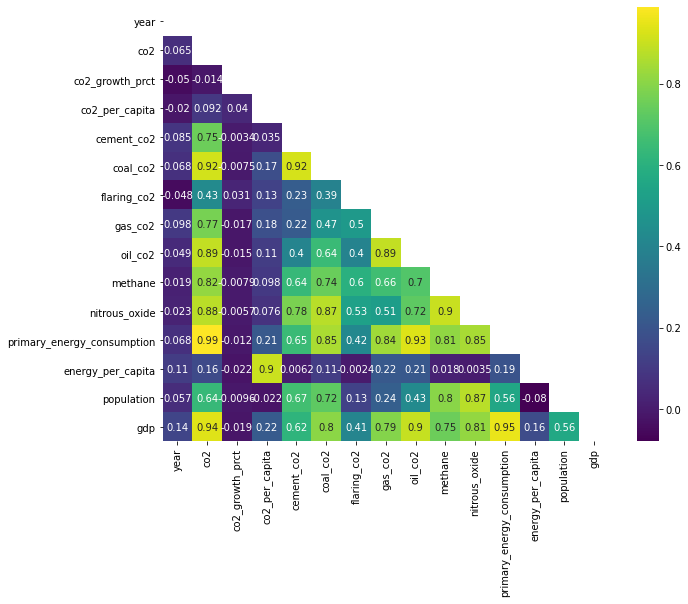

In [22]:
#heatmap with correlation
mask=np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df1.corr(), mask=mask, annot=True,ax=ax, cmap ='viridis')

#### Select year 2016

Filter for year 2016 in order to apply the clustering.

In [23]:
df_year = df1[df1['year'] == 2016]
df_year

,country,year,co2,co2_growth_prct,co2_per_capita,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,methane,nitrous_oxide,primary_energy_consumption,energy_per_capita,population,gdp
67,Afghanistan,2016,6.745,-14.670,0.191,0.076,2.878,NaN,0.319,3.472,78.17,9.13,NaN,NaN,35383000.0,6.429743e+10
290,Albania,2016,4.496,-0.808,1.558,0.781,0.191,NaN,0.161,3.363,3.25,1.26,NaN,NaN,2886000.0,3.435154e+10
394,Algeria,2016,148.839,-1.312,3.670,9.156,NaN,6.269,78.677,54.736,49.44,11.91,616.858,15211.900,40551000.0,5.340000e+11
424,Andorra,2016,0.469,0.787,6.091,NaN,NaN,NaN,NaN,0.469,0.05,0.00,NaN,NaN,77000.0,NaN
494,Angola,2016,34.111,0.388,1.183,1.937,NaN,12.762,1.495,17.917,51.61,21.00,NaN,NaN,28842000.0,1.480000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,Venezuela,2016,163.191,-4.511,5.467,3.154,0.469,33.921,48.756,76.891,82.81,14.87,840.419,28153.813,29851000.0,3.960000e+11
23158,Vietnam,2016,185.432,0.540,1.980,29.489,81.561,NaN,20.368,54.015,91.01,24.22,859.807,9182.052,93640000.0,5.750000e+11
23517,Yemen,2016,10.426,-19.840,0.384,0.837,0.359,NaN,0.986,8.244,8.15,3.36,NaN,NaN,27168000.0,6.272208e+10
23587,Zambia,2016,4.838,12.623,0.296,1.046,0.854,NaN,NaN,2.939,119.33,28.52,NaN,NaN,16363000.0,5.757741e+10


In [24]:
#check nulls
df_year.isnull().sum()

country                         0
year                            0
co2                             0
co2_growth_prct                 9
co2_per_capita                  1
cement_co2                     58
coal_co2                       86
flaring_co2                   137
gas_co2                        87
oil_co2                         0
methane                        19
nitrous_oxide                  19
primary_energy_consumption    129
energy_per_capita             129
population                      0
gdp                            46
dtype: int64

#### Create column 'gdp_per_capita' 

For the analysis, I want to study the co2 emissions per capita, so in order to be able to compare them with the gdp of each country, I need to convert the gdp to gdp per capita as well.

In [25]:
df_year['gdp_per_capita'] = df_year['gdp']/df_year['population']

In [26]:
#check that it's created
df_year

,country,year,co2,co2_growth_prct,co2_per_capita,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,methane,nitrous_oxide,primary_energy_consumption,energy_per_capita,population,gdp,gdp_per_capita
67,Afghanistan,2016,6.745,-14.670,0.191,0.076,2.878,NaN,0.319,3.472,78.17,9.13,NaN,NaN,35383000.0,6.429743e+10,1817.184155
290,Albania,2016,4.496,-0.808,1.558,0.781,0.191,NaN,0.161,3.363,3.25,1.26,NaN,NaN,2886000.0,3.435154e+10,11902.820590
394,Algeria,2016,148.839,-1.312,3.670,9.156,NaN,6.269,78.677,54.736,49.44,11.91,616.858,15211.900,40551000.0,5.340000e+11,13168.602501
424,Andorra,2016,0.469,0.787,6.091,NaN,NaN,NaN,NaN,0.469,0.05,0.00,NaN,NaN,77000.0,NaN,NaN
494,Angola,2016,34.111,0.388,1.183,1.937,NaN,12.762,1.495,17.917,51.61,21.00,NaN,NaN,28842000.0,1.480000e+11,5131.405589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,Venezuela,2016,163.191,-4.511,5.467,3.154,0.469,33.921,48.756,76.891,82.81,14.87,840.419,28153.813,29851000.0,3.960000e+11,13265.887240
23158,Vietnam,2016,185.432,0.540,1.980,29.489,81.561,NaN,20.368,54.015,91.01,24.22,859.807,9182.052,93640000.0,5.750000e+11,6140.538232
23517,Yemen,2016,10.426,-19.840,0.384,0.837,0.359,NaN,0.986,8.244,8.15,3.36,NaN,NaN,27168000.0,6.272208e+10,2308.674789
23587,Zambia,2016,4.838,12.623,0.296,1.046,0.854,NaN,NaN,2.939,119.33,28.52,NaN,NaN,16363000.0,5.757741e+10,3518.756375


#### Visualize gdp and co2 per capita

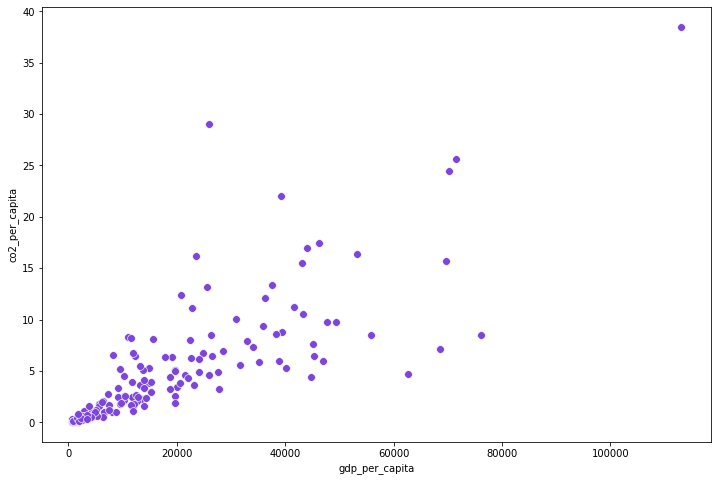

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_year, x="gdp_per_capita", y="co2_per_capita", color='#7c46dc', s=60);

It can be seen that gdp and co2 emissions per capita are strongly related.

## Unsupervised Machine Learning: K-Means <a class="anchor" id="kmeans"></a>

In [28]:
#drop nulls in both, to apply ML 
df_year = df_year[df_year['gdp_per_capita'].notna()]
df_year = df_year[df_year['co2_per_capita'].notna()]

In [29]:
df_year

,country,year,co2,co2_growth_prct,co2_per_capita,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,methane,nitrous_oxide,primary_energy_consumption,energy_per_capita,population,gdp,gdp_per_capita
67,Afghanistan,2016,6.745,-14.670,0.191,0.076,2.878,NaN,0.319,3.472,78.17,9.13,NaN,NaN,35383000.0,6.429743e+10,1817.184155
290,Albania,2016,4.496,-0.808,1.558,0.781,0.191,NaN,0.161,3.363,3.25,1.26,NaN,NaN,2886000.0,3.435154e+10,11902.820590
394,Algeria,2016,148.839,-1.312,3.670,9.156,NaN,6.269,78.677,54.736,49.44,11.91,616.858,15211.900,40551000.0,5.340000e+11,13168.602501
494,Angola,2016,34.111,0.388,1.183,1.937,NaN,12.762,1.495,17.917,51.61,21.00,NaN,NaN,28842000.0,1.480000e+11,5131.405589
720,Argentina,2016,190.930,-0.747,4.388,4.029,4.192,1.898,96.301,84.510,121.54,48.33,999.218,22966.307,43508000.0,8.200000e+11,18847.108578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,Venezuela,2016,163.191,-4.511,5.467,3.154,0.469,33.921,48.756,76.891,82.81,14.87,840.419,28153.813,29851000.0,3.960000e+11,13265.887240
23158,Vietnam,2016,185.432,0.540,1.980,29.489,81.561,NaN,20.368,54.015,91.01,24.22,859.807,9182.052,93640000.0,5.750000e+11,6140.538232
23517,Yemen,2016,10.426,-19.840,0.384,0.837,0.359,NaN,0.986,8.244,8.15,3.36,NaN,NaN,27168000.0,6.272208e+10,2308.674789
23587,Zambia,2016,4.838,12.623,0.296,1.046,0.854,NaN,NaN,2.939,119.33,28.52,NaN,NaN,16363000.0,5.757741e+10,3518.756375


#### Features selection

The goal is to create cluster with countries in terms of co2 and gdp per capita.

In [30]:
X=df_year[['co2_per_capita', 'gdp_per_capita']]

In [31]:
X

,co2_per_capita,gdp_per_capita
67,0.191,1817.184155
290,1.558,11902.820590
394,3.670,13168.602501
494,1.183,5131.405589
720,4.388,18847.108578
...,...,...
23030,5.467,13265.887240
23158,1.980,6140.538232
23517,0.384,2308.674789
23587,0.296,3518.756375


#### Pre-processing

In [32]:
#standardization using Standardscaler method
from sklearn.preprocessing import StandardScaler
X_stan = StandardScaler().fit_transform(X)

In [33]:
# dataframe of scaled features
X_stan_df = pd.DataFrame(X_stan, columns=X.columns)

In [34]:
X_stan_df

,co2_per_capita,gdp_per_capita
0,-0.785491,-0.880761
1,-0.552905,-0.342085
2,-0.193562,-0.274479
3,-0.616709,-0.703748
4,-0.071400,0.028811
...,...,...
155,0.112185,-0.269283
156,-0.481105,-0.649850
157,-0.752653,-0.854511
158,-0.767626,-0.789880


#### Run model with default number of clusters

In [35]:
#get model with default number of clusters = 8
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(X_stan_df)

KMeans()

In [36]:
#get centroids
kmeans.cluster_centers_

array([[-6.45428440e-01, -6.98013307e-01],
       [ 5.11426169e-01,  1.16483119e+00],
       [ 5.73218691e+00,  5.05951136e+00],
       [ 5.10086266e-02, -3.43433671e-04],
       [ 3.52772581e+00,  7.66522990e-01],
       [ 3.44316461e+00,  2.80639487e+00],
       [ 1.64384864e+00,  9.09461711e-01],
       [ 6.95470129e-01,  2.57817866e+00]])

In [37]:
#total inertia of all the centroids
kmeans.inertia_

24.425972620534424

In [38]:
#get prediction
clusters = kmeans.predict(X_stan)
clusters

array([0, 0, 3, 0, 3, 0, 6, 1, 3, 4, 0, 3, 3, 1, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 6, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 1, 0, 1, 0, 0, 3, 0, 0,
       0, 3, 6, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,
       3, 3, 7, 1, 1, 0, 1, 0, 6, 0, 5, 0, 0, 3, 3, 0, 0, 3, 3, 7, 0, 0,
       3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 7, 6,
       0, 3, 0, 0, 0, 3, 3, 2, 3, 6, 0, 0, 0, 6, 0, 3, 3, 0, 7, 3, 3, 3,
       6, 1, 0, 0, 1, 7, 0, 1, 0, 0, 3, 0, 4, 0, 3, 6, 0, 3, 5, 1, 6, 3,
       0, 3, 0, 0, 0, 0])

In [39]:
#prediction: cluster size - no of countries in each cluster
pd.Series(clusters).value_counts().sort_index()

0    79
1    18
2     1
3    43
4     2
5     2
6    10
7     5
dtype: int64

In [40]:
#assign to each its respective cluster and store it in another column
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df

,co2_per_capita,gdp_per_capita,cluster
67,0.191,1817.184155,0
290,1.558,11902.820590,0
394,3.670,13168.602501,3
494,1.183,5131.405589,0
720,4.388,18847.108578,3
...,...,...,...
23030,5.467,13265.887240,3
23158,1.980,6140.538232,0
23517,0.384,2308.674789,0
23587,0.296,3518.756375,0


<AxesSubplot:>

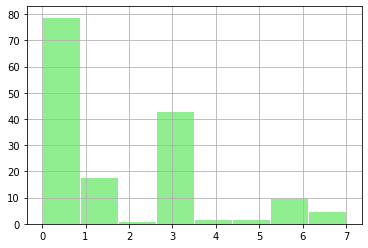

In [41]:
#no of countries per cluster
X_df['cluster'].hist(bins=8, edgecolor = "white", color='lightgreen')

##### Elbow method to get optimal k

In [42]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_stan)
    distortions.append(kmeanModel.inertia_)

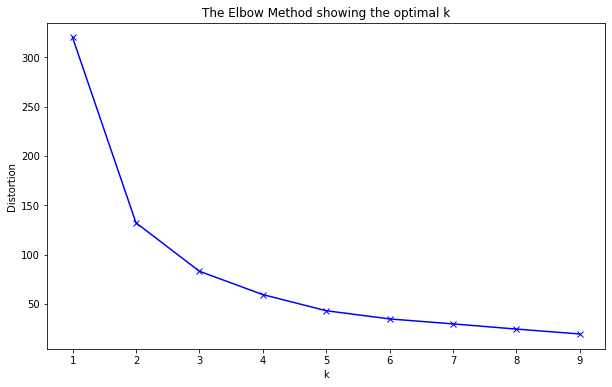

In [43]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimal number of clusters in this case is 3.

#### Run model with optimal number of clusters

In [44]:
k_opt=3
kmeans = KMeans(n_clusters=k_opt,random_state=25)

kmeans.fit(X_stan)

clusters = kmeans.predict(X_stan)
clusters

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 1])

In [45]:
df_clustered = pd.DataFrame(X_stan, columns=X_stan_df.columns)
df_clustered

,co2_per_capita,gdp_per_capita
0,-0.785491,-0.880761
1,-0.552905,-0.342085
2,-0.193562,-0.274479
3,-0.616709,-0.703748
4,-0.071400,0.028811
...,...,...
155,0.112185,-0.269283
156,-0.481105,-0.649850
157,-0.752653,-0.854511
158,-0.767626,-0.789880


In [46]:
df_clustered['cluster_id'] = clusters
df_clustered['cluster_id'].value_counts()

1    110
0     41
2      9
Name: cluster_id, dtype: int64

<AxesSubplot:>

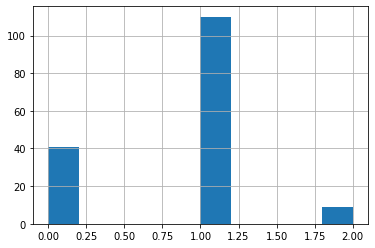

In [47]:
#no of countries per cluster
df_clustered['cluster_id'].hist()

In [48]:
kmeans.cluster_centers_

array([[ 0.58556506,  0.9654451 ],
       [-0.4701411 , -0.53878489],
       [ 3.07859488,  2.18700985]])

In [49]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X_stan_df.columns)
cluster_centers_df

,co2_per_capita,gdp_per_capita
0,0.585565,0.965445
1,-0.470141,-0.538785
2,3.078595,2.187010


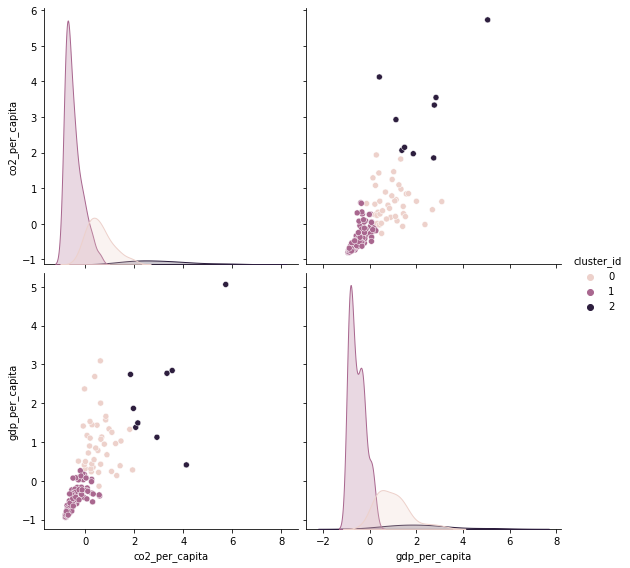

In [50]:
#plot features of df_clustered and the clusters
import seaborn as sns
sns.pairplot(df_clustered.dropna(), hue='cluster_id',size=4,vars=df_clustered[['co2_per_capita','gdp_per_capita']],kind='scatter')

#### Visualize the results

In [51]:
# create a clusters list
# clusters_x1[i] have a list of x1 from cluster i
clusters_x1=[]  
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==0]["gdp_per_capita"].tolist())
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==1]["gdp_per_capita"].tolist())
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==2]["gdp_per_capita"].tolist())

# clusters_x2[i] a list of x2 from cluster i
clusters_x2=[] 
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==0]["co2_per_capita"].tolist())
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==1]["co2_per_capita"].tolist())
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==2]["co2_per_capita"].tolist())


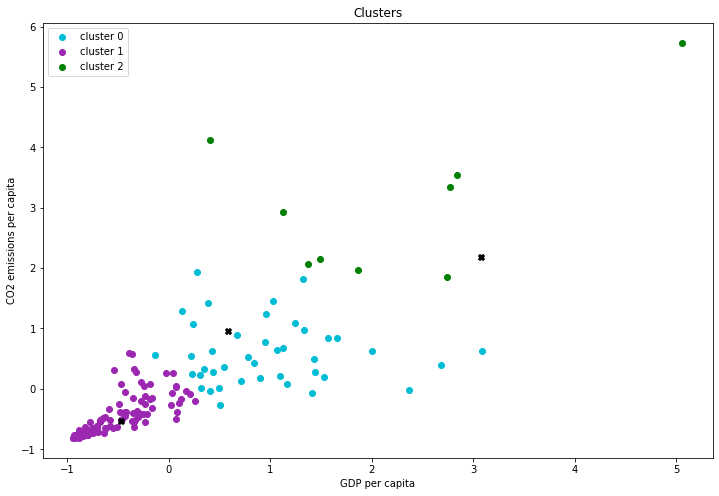

In [52]:
# draw points from each cluster with different colors
plt.figure(figsize=(12,8))
colors=["#00bcd4", "#9c27b0", "green"]
label=["cluster 0", "cluster 1", "cluster 2"]
for i in range(k_opt):
    plt.scatter(clusters_x1[i], clusters_x2[i], c=colors[i], label=label[i])
# draw the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker="X", c="black" )
plt.xlabel("GDP per capita")
plt.ylabel('CO2 emissions per capita')
plt.title("Clusters")
plt.legend()
plt.show()

#### Get which countries are in each cluster.

In [53]:
#Add the cluster column to the df_year (df from 2016)
df_year['cluster_id'] = clusters

In [54]:
cluster_0=df_year[df_year["cluster_id"]==0]
cluster_1=df_year[df_year["cluster_id"]==1]
cluster_2=df_year[df_year["cluster_id"]==2]

Which countries are in each cluster?

##### Cluster 0

In [55]:
df_year[df_year["cluster_id"]==0]["country"]

1746            Austria
2640            Belgium
4166             Canada
5269             Cyprus
5429            Czechia
5706            Denmark
6994            Estonia
8168            Finland
8380             France
9012            Germany
9221             Greece
9858          Hong Kong
10048           Hungary
10129           Iceland
10595              Iran
10797           Ireland
10887            Israel
11047             Italy
11269             Japan
11529        Kazakhstan
12675         Lithuania
13093          Malaysia
13273             Malta
14653       Netherlands
14865       New Zealand
16067            Norway
16283              Oman
17122            Poland
17272          Portugal
17696            Russia
18553        Seychelles
18693         Singapore
18947          Slovakia
19082          Slovenia
19607       South Korea
19867             Spain
20283            Sweden
20445       Switzerland
20658            Taiwan
21714      Turkmenistan
22365    United Kingdom
Name: country, d

European countries and some Asian countries. 

##### Cluster 1

In [56]:
df_year[df_year["cluster_id"]==1]["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia',
       'Democratic Republic of Congo', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan',
       'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanm

Mostly African and American countries.

##### Cluster 2

In [57]:
df_year[df_year["cluster_id"]==2]["country"]

1544                Australia
2093                  Bahrain
11744                  Kuwait
12750              Luxembourg
17344                   Qatar
18299            Saudi Arabia
21273     Trinidad and Tobago
22095    United Arab Emirates
22585           United States
Name: country, dtype: object

Countries with high fossil fuels consumption.

#### Visualize the CO2 emissions of different countries.

In [58]:
countries=["Germany","Spain", "China", "Kuwait", "India", "United States", "France", "Argentina"] 
list_df=[]
for i in range(len(countries)):
    list_df.append(df[df["country"]==countries[i]])

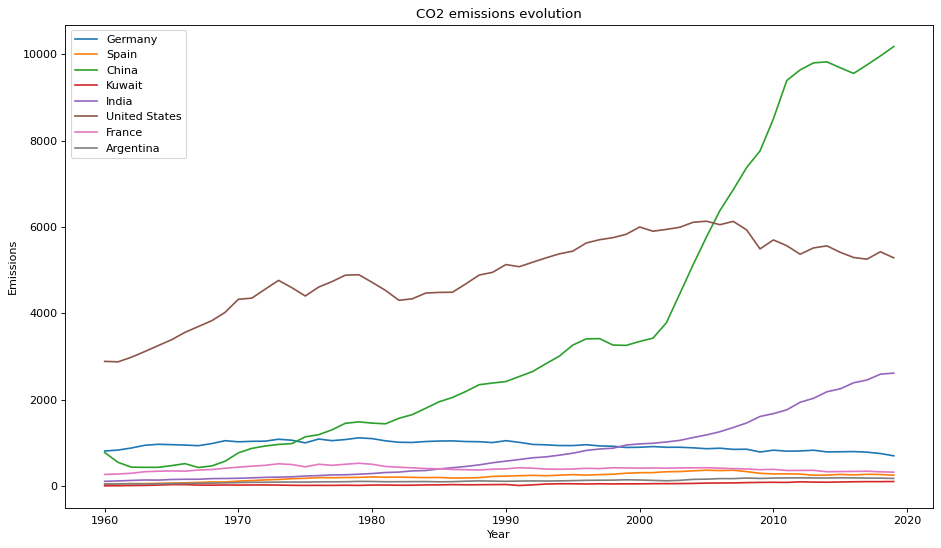

In [59]:
# temporal evolution of CO2 emissions in those countries
plt.figure(figsize=(14,8),dpi=80)
for i in range(len(countries)):
    plt.plot(list_df[i]["year"], list_df[i]["co2"], marker="", label=countries[i])
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title("CO2 emissions evolution")
plt.legend()
plt.show()

This help us to understand that the CO2 emissions in total for some countries can be really higher in comparison with other, like China, but not the CO2 per capita, as China's population is extremely high.

#### Second iteration: adding energy_per_capita

Repeat the kmeans clustering, but now adding a new column 'energy_per_capita', as the energy consumption is directly related to the emissions as well.

In [60]:
#features selection
X=df_year[['co2_per_capita', 'gdp_per_capita','energy_per_capita']]

In [61]:
#checking nulls
X.isnull().sum()

co2_per_capita        0
gdp_per_capita        0
energy_per_capita    82
dtype: int64

In [62]:
X = X.dropna()

In [63]:
#preprocessing
X_stan = StandardScaler().fit_transform(X)
X_stan_df = pd.DataFrame(X_stan, columns=X.columns)

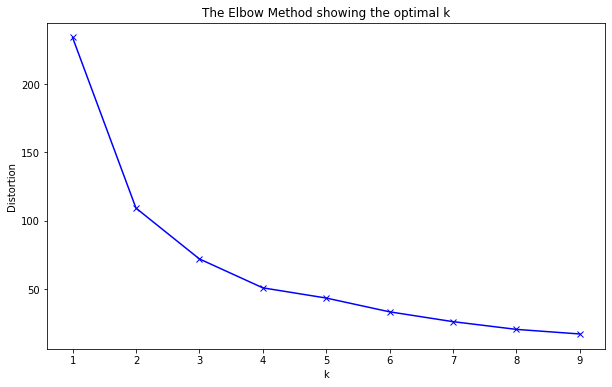

In [64]:
#elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_stan)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Run model with optimal number of clusters

In [65]:
k_opt=4
kmeans = KMeans(n_clusters=k_opt,random_state=25)

kmeans.fit(X_stan)

clusters = kmeans.predict(X_stan)
clusters

array([1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 1, 2, 1, 3, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1])

In [66]:
df_clustered = pd.DataFrame(X_stan, columns=X_stan_df.columns)
df_clustered['cluster_id'] = clusters
df_clustered['cluster_id'].value_counts()

1    40
2    26
0    11
3     1
Name: cluster_id, dtype: int64

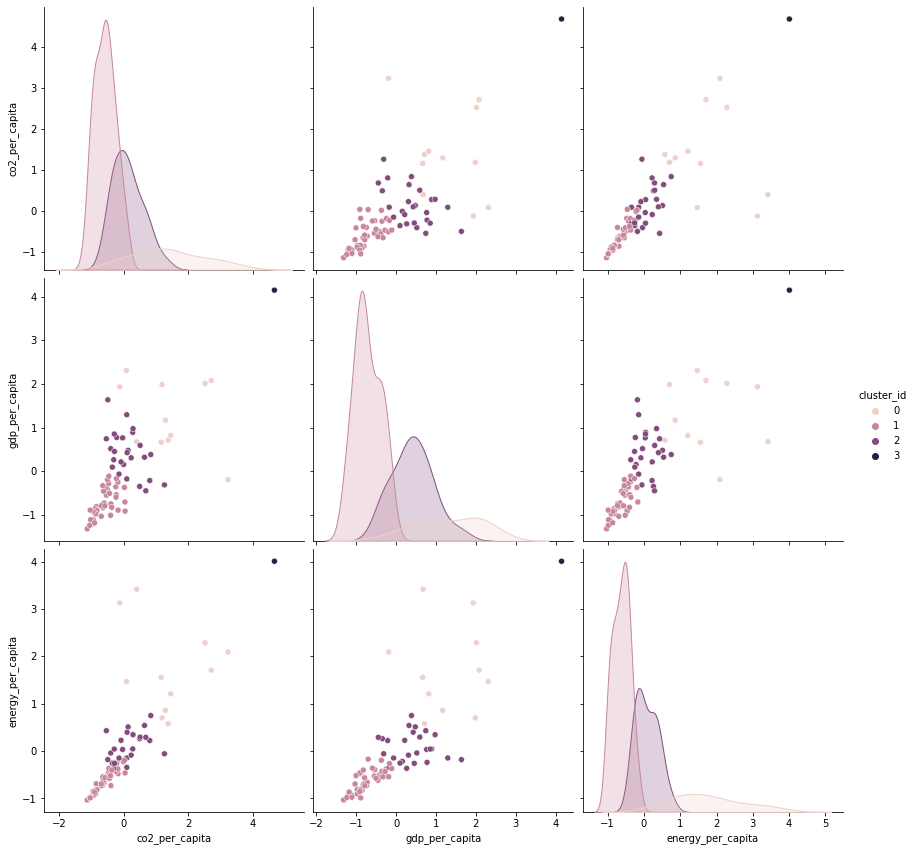

In [67]:
#plot features of df_clustered and the clusters
import seaborn as sns
sns.pairplot(df_clustered.dropna(), hue='cluster_id',size=4,vars=df_clustered[['co2_per_capita','gdp_per_capita','energy_per_capita']],kind='scatter')

In [68]:
# create a clusters list
# clusters_x1[i] have a list of x1 from cluster i
clusters_x1=[]  
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==0]["energy_per_capita"].tolist())
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==1]["energy_per_capita"].tolist())
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==2]["energy_per_capita"].tolist())
clusters_x1.append(df_clustered[df_clustered["cluster_id"]==3]["energy_per_capita"].tolist())

# clusters_x2[i] a list of x2 from cluster i
clusters_x2=[] 
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==0]["co2_per_capita"].tolist())
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==1]["co2_per_capita"].tolist())
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==2]["co2_per_capita"].tolist())
clusters_x2.append(df_clustered[df_clustered["cluster_id"]==3]["co2_per_capita"].tolist())

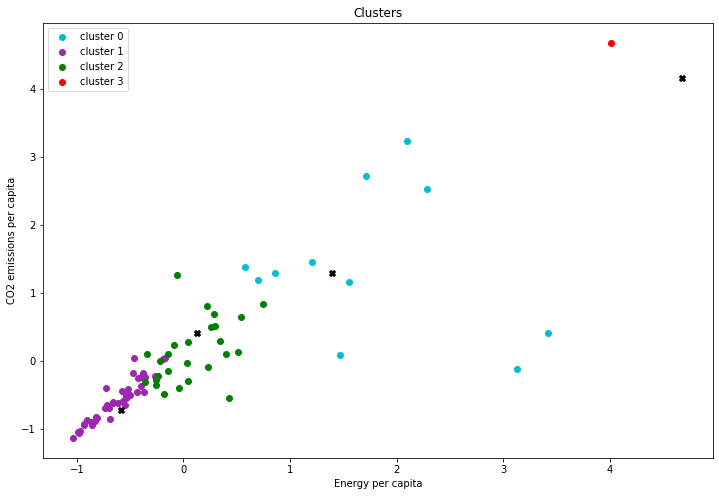

In [69]:
# draw points from each cluster with different colors
plt.figure(figsize=(12,8))
colors=["#00bcd4", "#9c27b0", "green", "red"]
label=["cluster 0", "cluster 1", "cluster 2", "cluster 3"]
for i in range(k_opt):
    plt.scatter(clusters_x1[i], clusters_x2[i], c=colors[i], label=label[i])
# draw the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker="X", c="black" )
plt.xlabel("Energy per capita")
plt.ylabel('CO2 emissions per capita')
plt.title("Clusters")
plt.legend()
plt.show()

In [70]:
df_year.isnull().sum()

country                        0
year                           0
co2                            0
co2_growth_prct                0
co2_per_capita                 0
cement_co2                    19
coal_co2                      45
flaring_co2                   91
gas_co2                       46
oil_co2                        0
methane                        2
nitrous_oxide                  2
primary_energy_consumption    82
energy_per_capita             82
population                     0
gdp                            0
gdp_per_capita                 0
cluster_id                     0
dtype: int64

In [71]:
df_year1 = df_year[df_year['energy_per_capita'].notna()]

#### Add clusters to original df 2016

In [72]:
df_year1['cluster_id_2'] = clusters

In [73]:
cluster_0=df_year1[df_year1["cluster_id_2"]==0]
cluster_1=df_year1[df_year1["cluster_id_2"]==1]
cluster_2=df_year1[df_year1["cluster_id_2"]==2]
cluster_3=df_year1[df_year1["cluster_id_2"]==3]

Which countries are in each cluster?

##### Cluster 0

In [74]:
df_year1[df_year1["cluster_id_2"]==0]["country"]

1544                Australia
4166                   Canada
10129                 Iceland
11744                  Kuwait
12750              Luxembourg
16067                  Norway
18299            Saudi Arabia
18693               Singapore
21273     Trinidad and Tobago
22095    United Arab Emirates
22585           United States
Name: country, dtype: object

##### Cluster 1

In [75]:
df_year1[df_year1["cluster_id_2"]==1]["country"]

394              Algeria
720            Argentina
1936          Azerbaijan
2167          Bangladesh
2449             Belarus
3380              Brazil
3664            Bulgaria
4483               Chile
4602               China
4715            Colombia
5120             Croatia
5269              Cyprus
6519             Ecuador
6628               Egypt
9221              Greece
10048            Hungary
10280              India
10411          Indonesia
10595               Iran
10688               Iraq
12190             Latvia
12675          Lithuania
13093           Malaysia
13563             Mexico
14138            Morocco
15879    North Macedonia
16357           Pakistan
16792               Peru
16902        Philippines
17272           Portugal
17506            Romania
18947           Slovakia
19356       South Africa
19937          Sri Lanka
21004           Thailand
21524             Turkey
22034            Ukraine
22863         Uzbekistan
23030          Venezuela
23158            Vietnam


##### Cluster 2

In [76]:
df_year1[df_year1["cluster_id_2"]==2]["country"]

1746            Austria
2640            Belgium
5706            Denmark
6994            Estonia
8168            Finland
8380             France
9012            Germany
9858          Hong Kong
10797           Ireland
10887            Israel
11047             Italy
11269             Japan
11529        Kazakhstan
14653       Netherlands
14865       New Zealand
16283              Oman
17122            Poland
17696            Russia
19082          Slovenia
19607       South Korea
19867             Spain
20283            Sweden
20445       Switzerland
20658            Taiwan
21714      Turkmenistan
22365    United Kingdom
Name: country, dtype: object

##### Cluster 3

In [77]:
df_year1[df_year1["cluster_id_2"]==3]["country"]

17344    Qatar
Name: country, dtype: object